In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

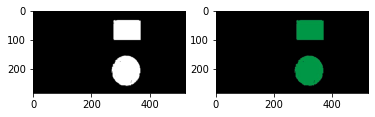

In [ ]:
image = io.imread("/content/drive/MyDrive/GoogleColab/figColores.jpg")
img_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)

#Primer umbral del color rojo en HSV
umbral_bajo1 = (55,100,100)
umbral_alto1 = (65,255,255)

#Segundo umbral del color rojo en HSV
umbral_bajo2 = (65,100,100)
umbral_alto2 = (75,255,255)

#Se aplica la mascara y se filtra en la original
#Con la mascara 1 si encuentra el color, de lo contraio 0
mask1 = cv.inRange(img_hsv, umbral_bajo1, umbral_alto1)
mask2 = cv.inRange(img_hsv, umbral_bajo2, umbral_alto2)
mask = mask1 + mask2
res = cv.bitwise_and(image, image, mask=mask)

#Se muestran los resultados
plt.subplot(1, 2, 1) # 1 fila, 2 columnas y crea ejes en la posición 1
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()


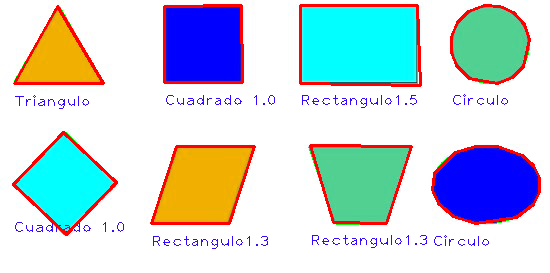

In [ ]:
#DETECCION DE BORDES
from google.colab.patches import cv2_imshow
image = io.imread("/content/drive/MyDrive/GoogleColab/figTodas.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
#Detección de bordes con Canny --- (Imagen_gris, umbral_min, umbral_max)
canny = cv.Canny(gray, 14, 150)
#Mejoramiento de la imagen aplicando Dilate (dilatación) y Erode(erosión)
#Dilatación agrega pixeles al borde y Erosión los quita
canny = cv.dilate(canny, None, iterations=1)
canny = cv.erode(canny, None, iterations=1)
cnts,_ = cv.findContours(canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#-1 significa dibuje todos los contornos
cv.drawContours(image, cnts, -1, (0,255,0), 1)
for c in cnts:
  #Epsilon al 1%, muy preciso, si aumenta, disminuye la precisión
  #Perimetro
  epsilon = 0.01*cv.arcLength(c,True)
  #Aproximación a poligono de forma conocida
  approx = cv.approxPolyDP(c,epsilon,True)
  #vertices encontrados en la figura
  x,y,w,h = cv.boundingRect(approx)
  #parametros de putText
  coloText = [255,10,50]
  grosor = 1
  escala = 1.02
  letra =1
  if len(approx)==3:
    cv.putText(image,'Triangulo', (x,y+100),letra,escala,(coloText),grosor)
  if len(approx)==4:
    aspect_ratio = round(float(w)/h,1)
  #print('aspect_ratio= ', round(aspect_ratio,1))
    if aspect_ratio == 1:
      cv.putText(image,('Cuadrado '+str(aspect_ratio)), (x,y+100),letra,escala,(coloText),grosor)
    else:
      cv.putText(image,('Rectangulo'+str(aspect_ratio)), (x,y+100),letra,escala,(coloText),grosor)
  if len(approx)==5:
    cv.putText(image,'Pentagono', (x,y+100),letra,escala,(coloText),grosor)
  if len(approx)==6:
    cv.putText(image,'Hexagono', (x,y+100),letra,escala,(coloText),grosor)
  if len(approx)>10:
    cv.putText(image,'Circulo', (x,y+100),letra,escala,(coloText),grosor)
  #parametros de drawContourns
  colorC = [0,0,255]
  grosorC =2
  cv.drawContours(image, [approx], 0, colorC, grosorC)
cv2_imshow(image)


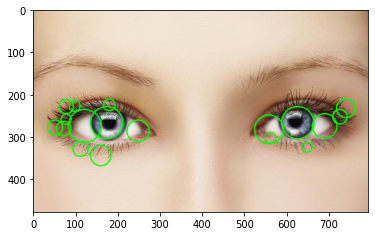

In [14]:
image = io.imread("/content/drive/MyDrive/GoogleColab/figOjos.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Convert to grayscale.
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv.HoughCircles(gray_blurred, 
                   cv.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv.circle(image, (a, b), r, (0, 255, 0), 2)

    
    #cv2_imshow(image)
    plt.imshow(image)


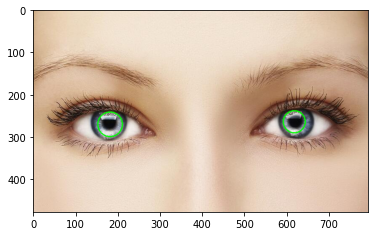

In [ ]:
image = io.imread("/content/drive/MyDrive/GoogleColab/figOjos.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Convert to grayscale.
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
#gray_blurred = cv.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv.HoughCircles(gray, 
                   cv.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 48, minRadius = 1, maxRadius = 40)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv.circle(image, (a, b), r, (0, 255, 0), 2)

    
    #cv2_imshow(image)
    plt.imshow(image)

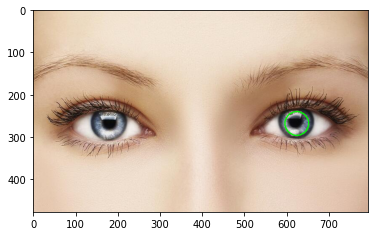

In [ ]:
image = io.imread("/content/drive/MyDrive/GoogleColab/figOjos.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Convert to grayscale.
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv.HoughCircles(gray_blurred, 
                   cv.HOUGH_GRADIENT, 1, 400, param1 = 50,
               param2 = 48, minRadius = 1, maxRadius = 40)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv.circle(image, (a, b), r, (0, 255, 0), 2)

    
    #cv2_imshow(image)
    plt.imshow(image)

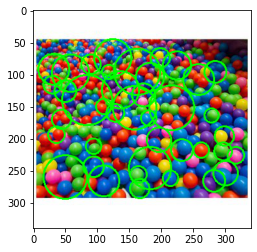

In [ ]:
image = io.imread("/content/drive/MyDrive/GoogleColab/figPelotas.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
 
# Convert to grayscale.
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv.HoughCircles(gray_blurred, 
                   cv.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]

  
        # Draw the circumference of the circle.
        cv.circle(image, (a, b), r, (0, 255, 0), 2)
 
    
    #cv2_imshow(image)
    plt.imshow(image)

True

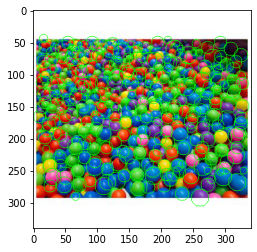

In [ ]:
image = io.imread("/content/drive/MyDrive/GoogleColab/figPelotas.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Convert to grayscale.
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Blur using 3 * 3 kernel. difumina la imagen para agrupar mas
# tonos en un mismo circulo
gray_blurred = cv.blur(gray, (1, 1))
# Apply Hough transform on the blurred image.
detected_circles = cv.HoughCircles(gray_blurred,
cv.HOUGH_GRADIENT,
1, #dp
8, #distancia minima entre puntos
param1 = 20,
param2 = 15, #cuanto mas pequeño, mayor cant de circulo
minRadius = 2,
maxRadius = 15)

# Draw circles that are detected.
if detected_circles is not None:
  # Convert the circle parameters a, b and r to integers.
  detected_circles = np.uint16(np.around(detected_circles))
for pt in detected_circles[0, :]:
  a, b, r = pt[0], pt[1], pt[2]
  # Draw the circumference of the circle.
  cv.circle(image, (a, b), r, (0, 255, 0), 1)

#cv2_imshow(image)
plt.imshow(image)
cv.imwrite("/content/drive/MyDrive/GoogleColab/PelotasID_1.jpg",image)

# PUNTO 5.1 - Detección del Iris:

Sin difuminado (blur)

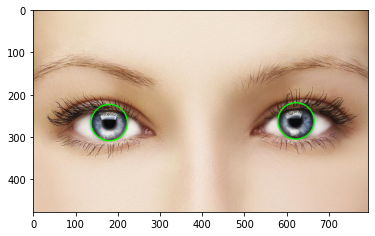

In [ ]:
image = io.imread("/content/drive/MyDrive/GoogleColab/figOjos.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Convert to grayscale.
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Blur using 3 * 3 kernel.
#gray_blurred = cv.blur(gray, (3, 3))
# Apply Hough transform on the blurred image.
detected_circles = cv.HoughCircles(gray,

cv.HOUGH_GRADIENT,
1,
400,
param1 = 50,
param2 = 48,
minRadius = 1,
maxRadius = 50)

# Draw circles that are detected.
if detected_circles is not None:
  # Convert the circle parameters a, b and r to integers.
  detected_circles = np.uint16(np.around(detected_circles))
for pt in detected_circles[0, :]:
  a, b, r = pt[0], pt[1], pt[2]
  # Draw the circumference of the circle.
  cv.circle(image, (a, b), r, (0, 255, 0), 2)

#cv2_imshow(image)
plt.imshow(image)

Con difuminado (blur)

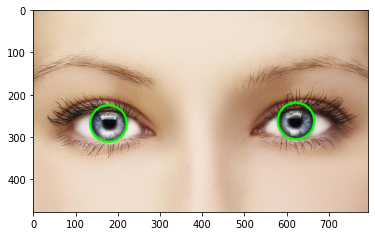

In [ ]:
image = io.imread("/content/drive/MyDrive/GoogleColab/figOjos.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Convert to grayscale.
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Blur using 3 * 3 kernel.
gray_blurred = cv.blur(gray, (7, 7))
# Apply Hough transform on the blurred image.
detected_circles = cv.HoughCircles(gray_blurred,
cv.HOUGH_GRADIENT,
1,
200,
param1 = 50,
param2 = 20,
minRadius = 1,
maxRadius = 50)

# Draw circles that are detected.
if detected_circles is not None:
  # Convert the circle parameters a, b and r to integers.
  detected_circles = np.uint16(np.around(detected_circles))
for pt in detected_circles[0, :]:
  a, b, r = pt[0], pt[1], pt[2]
  # Draw the circumference of the circle.
  cv.circle(image, (a, b), r, (0, 255, 0), 3)

#cv2_imshow(image)
plt.imshow(image)

# PUNTO 5.2 - Detección de pelotas y cambio de colores

In [ ]:
# Importar una imagen RGB con pelotas de minimo 3 colores diferentes
pelotas = io.imread("/content/drive/MyDrive/GoogleColab/pelotas_RBY.jpg")

# Definir las variables
colores = []
circulo =0
cantCirc = [0,0,0,0] #R,Y,B,G -- Orden de colores
salida = ""
lista_img =[]


# Se cambia el color de la imagen a HSV
pelotas_hsv = cv.cvtColor(pelotas, cv.COLOR_RGB2HSV)


# Se definen los Umbrales para los 4 colores solicitados (Rojo, Amarillo, Azul, Verde)
## Por practicidad de van a emplear 2 mascaras por color y emplear listas

# Primer listado de umbrales RGB en HSV
#Listas = [R,Y,B,G]
umbral_bajo1 = [(0,100,90),(25,100,90),(90,100,90),(48,100,90)]
umbral_alto1 = [(10,255,255),(30,255,255),(120,255,255),(70,255,255)]

# Segundo listado de umbrales RGB en HSV
umbral_bajo2 = [(170,100,90),(30,100,90),(120,100,90),(70,100,90)]
umbral_alto2 = [(180,255,255),(36,255,255),(124,255,255),(90,255,255)]

# Se aplica la mascara y se filtra en la original
# Con la mascara=1 si encuentra el color, de lo contraio 0

for i in range(len(cantCirc)):
  circulo =0

  mask1 = cv.inRange(pelotas_hsv,umbral_bajo1[i],umbral_alto1[i])
  mask2 = cv.inRange(pelotas_hsv, umbral_bajo2[i], umbral_alto2[i])
  mask = mask1 + mask2
  resultado = cv.bitwise_and(pelotas, pelotas, mask=mask)
  colores.append(resultado)

  # Pasar a escala de grises
  gris = cv.cvtColor(resultado, cv.COLOR_RGB2GRAY)

  # Crear las capas difuminadas
  gris_difu = cv.blur(gris, (1, 1))

  # Se aplica la transformación de Hough sobre la imagen difuminada.
  detected_circles = cv.HoughCircles(gris_difu,
                                    cv.HOUGH_GRADIENT, 
                                    1, # dp
                                    19, # Distancia minima entre puntos
                                    param1 = 20,
                                    param2 = 18, # Cuanto mas pequeño, mayor cant de circulo
                                    minRadius = 3, 
                                    maxRadius = 20)
  
  # Dibujar los circulos encontrados.
  if detected_circles is not None:
    
      # Convertir los parámetros del circulo en enteros.
      detected_circles = np.uint16(np.around(detected_circles))

      # Ciclo para extraer los valores indep. x,y,r (Coord y radio)
      for pt in detected_circles[0, :]:
          a, b, r = pt[0], pt[1], pt[2]
    
          # Dibujar la circunferencia.
          cv.circle(resultado, (a, b), r, (255, 255, 255), 2)
          circulo+=1
      
  cantCirc[i] = circulo
  # Se guarda la imagen
  salida = "/content/drive/MyDrive/GoogleColab/Color_"+ str(i+1)+".jpg"
  lista_img.append(salida)
  cv.imwrite(salida,resultado)

# Cambio de colores

In [ ]:
# Importar una imagen RGB con pelotas de minimo 3 colores diferentes
pelotas = io.imread("/content/drive/MyDrive/GoogleColab/pelotas_RBY.jpg")
pelotas1 = pelotas

# definir variables
cantCirc =[0,0,0,0]
newCol = [(60,90,68),(37,44,90),(150,15,200),(121,50,5)]
salida = ""
lista_img =[]


# Se cambia el color de la imagen a HSV
pelotas_hsv = cv.cvtColor(pelotas, cv.COLOR_RGB2HSV)

# Primer listado de umbrales RGB en HSV
#Listas = [R,Y,B,G]
umbral_bajo1 = [(0,100,60),(25,100,60),(90,100,60),(48,100,60)]
umbral_alto1 = [(10,255,255),(30,255,255),(120,255,255),(70,255,255)]

# Segundo listado de umbrales RGB en HSV
umbral_bajo2 = [(170,100,60),(30,100,60),(120,100,60),(70,100,60)]
umbral_alto2 = [(180,255,255),(42,255,255),(124,255,255),(90,255,255)]


for i in range(len(cantCirc)):
  # Creación de las máscaras por cada color identificado
  mask1 = cv.inRange(pelotas_hsv, umbral_bajo1[i], umbral_alto1[i])
  mask2 = cv.inRange(pelotas_hsv, umbral_bajo2[i], umbral_alto2[i])
  mask = mask1 + mask2
  
  # Se realiza el cambio de color a la imagen original acorde a los elementos
  # encontrados en las máscaras, el color para cada cambio se almaceno en una lista
  pelotas[mask>0] = newCol[i]

  # Se hace la transformacion de color para la imagen que se desea guardar
  #pelotas_rgb = cv.cvtColor(pelotas, cv.COLOR_BGR2RGB)
  
  # Se exporta la imagen al Drive
  # Se guarda la imagen
  salida = "/content/drive/MyDrive/GoogleColab/Cambio_Color_"+ str(i+1)+".jpg"
  lista_img.append(salida)
  cv.imwrite(salida,pelotas)

pelotas2 = cv.cvtColor(pelotas_hsv, cv.COLOR_HSV2RGB)
pelotas3 = cv.cvtColor(pelotas2, cv.COLOR_RGB2BGR)

for ur in lista_img:
  image = io.imread(ur)
  final_f = cv.hconcat((pelotas3,image))
  cv2_imshow(final_f)
  print ('\n')

Output hidden; open in https://colab.research.google.com to view.

In [18]:
pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 1.2 MB/s 


In [25]:
import mediapipe as mp
import cv2
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
with mp_pose.Pose(static_image_mode=True) as pose:
    image = cv2.imread("hombre-20.jpg")
    height, width, _ = image.shape
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    
    print("Pose landmarks:", results.pose_landmarks)

    cv2.imshow(image)
    cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: ignored